### **Diagnosis (M = malignant, B = benign)**

## **Importing libraries**

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import matplotlib.gridspec as gridspec # subplots

#Import models from scikit learn module:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

## **Load the data**

In [ ]:
# header=0; the first row of the CSV file will be treated as column names.
df = pd.read_csv('data.csv', header = 0)

In [ ]:
#Returning the first n rows(if not specified then 5 rows)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#Returns the last n rows(if not specified then 5 rows)
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [ ]:
#printing the dataset
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [ ]:
#printing the shape of the dataframe
df.shape

(569, 32)

In [ ]:
#printing the size of the dataframe
df.size

18208

In [ ]:
#printing the datatypes of the dataframe
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

## **Clean and prepare data**

In [ ]:
#Detect missing values for an array-like object
df.isnull()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#returning the number of missing values in the dataset
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
#printing information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#droping the Id column
df.drop('id',axis=1,inplace=True)
# length of the dataframe
len(df)

569

In [ ]:
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.head(15)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [ ]:
#finding the unique values from a series
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [ ]:
#assigning M= 1 and B=0
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#returning description of the data in the DataFrame
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


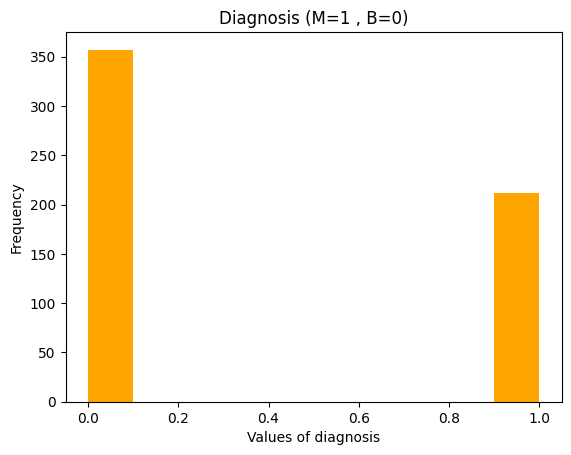

In [ ]:
#printing the histogram of the diagnosis,
#on the x axis we have values of diagnosis i.e M and B
#on y axis we have frequency of the M and B
df.describe()
plt.hist(df['diagnosis'], color = 'orange')
plt.title('Diagnosis (M=1 , B=0)')
plt.xlabel('Values of diagnosis')
plt.ylabel('Frequency')
plt.show()

In [ ]:
features_mean=list(df.columns[1:11])
# split dataframe into two based on diagnosis
dfM=df[df['diagnosis'] ==1]
dfB=df[df['diagnosis'] ==0]

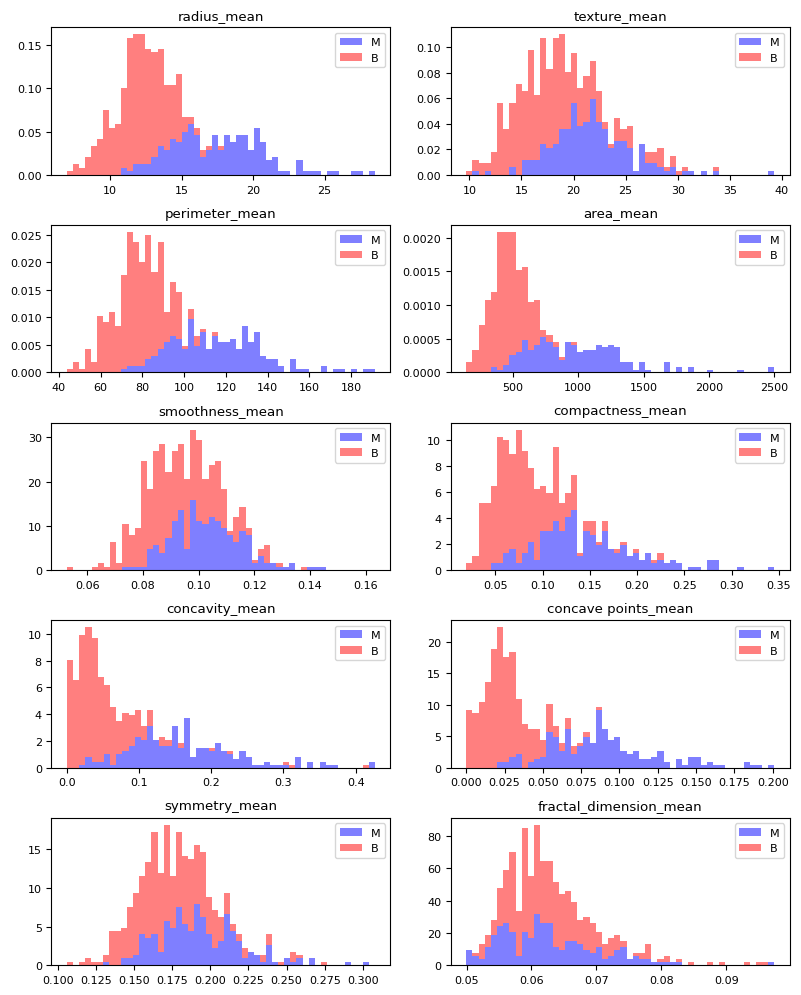

In [ ]:
#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, density = True, label=['M','B'],color=['b','r'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

**Observations:**

1) Cancer can be classified using the average values of the cell's radius, perimeter, area, compactness, concavity, and concave spots. These metrics' larger values frequently exhibit a link with malignant tumours.

2) There is no clear preference for one diagnosis over another in the mean values of texture, smoothness, symmetry, or fractual dimension. There are no observable huge outliers that need for additional cleanup in any of the histograms.

## **Creating a test set and a training set**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop('diagnosis',axis=1)
y = df['diagnosis']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state = 42)

In [ ]:
x_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
149,13.740,17.91,88.12,585.0,0.07944,0.06376,0.02881,0.01329,0.1473,0.05580,...,15.340,22.46,97.19,725.9,0.09711,0.18240,0.15640,0.06019,0.2350,0.07014
124,13.370,16.39,86.10,553.5,0.07115,0.07325,0.08092,0.02800,0.1422,0.05823,...,14.260,22.75,91.99,632.1,0.10250,0.25310,0.33080,0.08978,0.2048,0.07628
421,14.690,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,16.460,18.34,114.10,809.2,0.13120,0.36350,0.32190,0.11080,0.2827,0.09208
195,12.910,16.33,82.53,516.4,0.07941,0.05366,0.03873,0.02377,0.1829,0.05667,...,13.880,22.00,90.81,600.6,0.10970,0.15060,0.17640,0.08235,0.3024,0.06949
545,13.620,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.02443,0.1664,0.05801,...,15.350,29.09,97.58,729.8,0.12160,0.15170,0.10490,0.07174,0.2642,0.06953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,...,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,...,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,...,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550


In [ ]:
y_train

149    0
124    0
421    0
195    0
545    0
      ..
71     0
106    0
270    0
435    1
102    0
Name: diagnosis, Length: 398, dtype: int64

Outliers

In [ ]:
x_train.shape

(398, 30)

In [ ]:
# import numpy as np

x_columns = x_train.columns


# Set threshold for outliers
threshold = 3

for column in x_columns:
  # Calculate IQR for x_train and y_train
  q75_x, q25_x = np.percentile(x_train[column], [75 ,25])
  iqr_x = q75_x - q25_x


  # Identify indices of outliers
  outlier_indices_x = np.where((x_train[column] < q25_x - threshold * iqr_x) | (x_train[column] > q75_x + threshold * iqr_x))[0]

  # print(outlier_indices_x)

  # Remove outliers from x_train and y_train

  if outlier_indices_x is not None:
    # x_train[column] = np.delete(x_train[column], outlier_indices_x, axis=0)
    x_train.drop(x_train.index[outlier_indices_x], inplace=True)

    y_train.drop(y_train.index[outlier_indices_x], inplace=True)



In [ ]:
x_train.shape

(341, 30)

In [ ]:
y_train.shape

(341,)

## **Model Classification**

### **Logistic Regression**

In [ ]:
# Define the sigmoid function
def sigmoid(val):
    ot = 1 / (1 + np.exp(-val))
    return ot

In [ ]:
def optimize(x, y, learning_rate, iterations, parameters):
    size = x.shape[0]
    weight = parameters["weight"]
    bias = parameters["bias"]
    for i in range(iterations):
        sigma = sigmoid(np.dot(x, weight) + bias)
        loss = -1/size * np.sum((-y * np.log(sigma)) - ((1 - y) * np.log(1-sigma)))
        dW = 1/size * np.dot(x.T, (sigma - y))
        db = 1/size * np.sum(sigma - y)
        weight -= learning_rate * dW
        bias -= learning_rate * db
        parameters["weight"] = weight
        parameters["bias"] = bias
    return parameters


In [ ]:
# Initialize the weight and bais
init_parameters = {}
init_parameters["weight"] = np.zeros(x.shape[1])
init_parameters["bias"] = 0

In [ ]:
# Define the train function
def train(x, y, learning_rate,iterations):
    parameters_out = optimize(x, y, learning_rate, iterations ,init_parameters)
    return parameters_out

In [ ]:
# Train the model
parameters_out = train(x, y, learning_rate = 0.02, iterations = 500)

<ipython-input-31-df0cfc482c07>:7: RuntimeWarning: divide by zero encountered in log
  loss = -1/size * np.sum((-y * np.log(sigma)) - ((1 - y) * np.log(1-sigma)))
<ipython-input-30-ffa89a8915af>:3: RuntimeWarning: overflow encountered in exp
  ot = 1 / (1 + np.exp(-val))


In [ ]:
parameters_out

{'weight': array([-5.24764012e+00, -8.87164156e+00, -3.13635940e+01, -2.04994988e+01,
        -5.32296794e-02, -2.06230460e-03,  5.99147364e-02,  2.70060339e-02,
        -1.00585134e-01, -4.06321284e-02, -2.41823445e-02, -6.38652535e-01,
         5.68993209e-03,  1.27075042e+01, -3.71453699e-03, -1.36838445e-03,
         1.66031272e-03, -1.07559472e-03, -1.06357784e-02, -1.35097082e-03,
        -5.39732743e+00, -1.15226139e+01, -3.16204138e+01,  2.46797397e+01,
        -6.96292171e-02,  1.94279823e-02,  1.01651505e-01,  2.15575582e-02,
        -1.46097705e-01, -4.31206341e-02]),
 'bias': -0.6789054032316234}

In [ ]:
# Predict using the trained model
out_values = np.dot(x_test, parameters_out["weight"]) + parameters_out["bias"]
pred = sigmoid(out_values) >= 1/2
pred

<ipython-input-30-ffa89a8915af>:3: RuntimeWarning: overflow encountered in exp
  ot = 1 / (1 + np.exp(-val))


array([ True,  True,  True, False, False,  True,  True,  True, False,
       False, False,  True, False,  True, False,  True, False, False,
       False,  True,  True, False,  True, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,
        True, False,  True, False, False,  True, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False,  True,  True, False, False,  True,  True,
       False, False, False,  True,  True, False, False,  True,  True,
       False, False, False, False, False,  True, False, False,  True,
       False,  True,  True,  True,  True,  True,  True, False, False,
       False,  True,  True, False, False, False,  True,  True, False,
        True,  True, False,  True,  True, False, False, False,  True,
       False,  True,  True, False, False,  True, False,  True, False,
       False, False,  True, False, False, False,  True, False,  True,
        True, False,

In [ ]:
cm4 = confusion_matrix(y_test, pred)
ac_lr = accuracy_score(y_test, pred)

In [ ]:
cm4

array([[100,   8],
       [  2,  61]])

In [ ]:
ac_lr

0.9415204678362573

<Axes: >

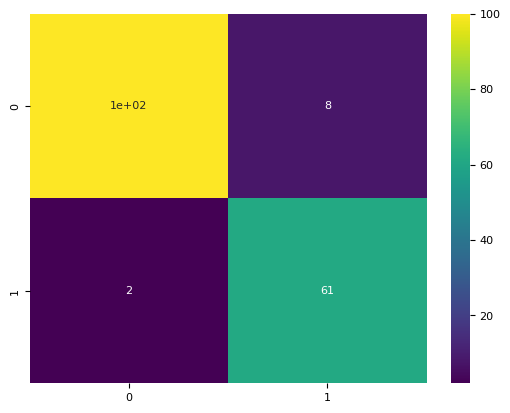

In [ ]:
sns.heatmap(cm4, annot=True, cmap = 'viridis')

In [ ]:
# map True values to 1 and False values to 0
pred = np.where(pred, 1, 0)

In [ ]:
def precision(true_labels, predicted_labels):
    tp = 0  # true positives
    fp = 0  # false positives

    for i in range(len(predicted_labels)):
        if predicted_labels[i] == 1 and true_labels[i] == 1:
            tp += 1
        elif predicted_labels[i] == 1 and true_labels[i] == 0:
            fp += 1

    return tp / (tp + fp)

In [ ]:
y_test[0]

1

In [ ]:
pred[0]

1

In [ ]:
# alternately using confusion matrix from above

tp = cm4[1, 1]
fp = cm4[0, 1]
fn = cm4[1, 0]
tn = cm4[0, 0]

# Calculate precision, recall, and F1-score
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)

print("Confusion Matrix:")
print(cm4)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

Confusion Matrix:
[[100   8]
 [  2  61]]
Precision: 0.8840579710144928
Recall: 0.9682539682539683
F1-Score: 0.9242424242424243


In [ ]:
y_test = np.asarray(y_test)

In [ ]:
# Prec = precision(y_test, pred)
# Prec

### **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

# making predictions on the testing set
y_pred3 = gnb.predict(x_test)

In [ ]:
cm3 = confusion_matrix(y_test, y_pred3)
ac_nb = accuracy_score(y_test, y_pred3)

In [ ]:
cm3

array([[103,   5],
       [  2,  61]])

In [ ]:
ac_nb

0.9590643274853801

<Axes: >

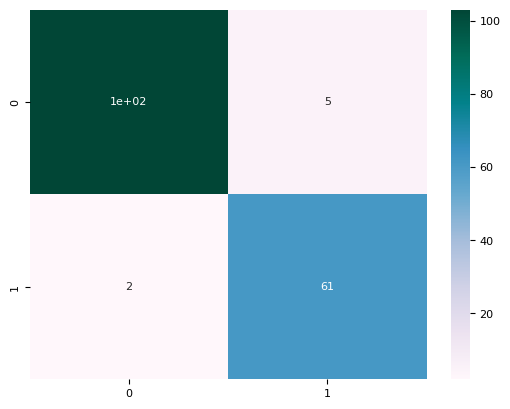

In [ ]:
sns.heatmap(cm3, annot=True, cmap = 'PuBuGn')

### **KNN Algorithm**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5,p=2)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [ ]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
cm = confusion_matrix(y_test, y_pred)
ac_knn = accuracy_score(y_test, y_pred)

In [ ]:
cm

array([[107,   1],
       [  8,  55]])

In [ ]:
ac_knn

0.9473684210526315

<Axes: >

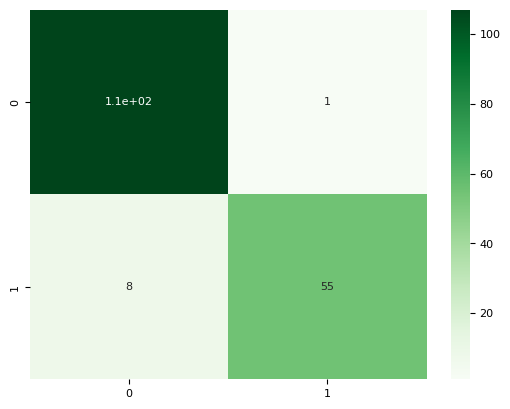

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True, cmap = 'Greens')

### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
model = tree.DecisionTreeClassifier()
model = model.fit(x_train, y_train)

predicted_value = model.predict(x_test)
print(predicted_value)

[0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1
 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1
 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0]


In [ ]:
# Function to perform training with giniIndex.
def train_using_gini(x_train, x_test, y_train):

    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)

    # Performing training
    clf_gini.fit(x_train, y_train)
    return clf_gini

In [ ]:
# Function to perform training with entropy.
def train_using_entropy(x_train, x_test, y_train):

    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)

    # Performing training
    clf_entropy.fit(x_train, y_train)
    return clf_entropy

In [ ]:
# Function to make predictions
def prediction(x_test, cl_obj):

    # Predicton on test with giniIndex
    y_pred1 = cl_obj.predict(x_test)
    print("Predicted values:")
    print(y_pred1)
    return y_pred1

In [ ]:
#using gini
clf_gini = train_using_gini(x_train, x_test, y_train)
y_pred1 = prediction(x_test, clf_gini)

#using entropy
clf_entropy = train_using_entropy(x_train, x_test, y_train)
y_pred2 = prediction(x_test, clf_entropy)

Predicted values:
[0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 0 1
 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1
 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0]
Predicted values:
[0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 1 0 1
 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1
 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0]


In [ ]:
cm1 = confusion_matrix(y_test, y_pred1)
ac_dtg = accuracy_score(y_test, y_pred1)

cm2 = confusion_matrix(y_test, y_pred2)
ac_dte = accuracy_score(y_test, y_pred2)

In [ ]:
cm1

array([[106,   2],
       [  7,  56]])

In [ ]:
ac_dtg

0.9473684210526315

In [ ]:
cm2

array([[104,   4],
       [  4,  59]])

In [ ]:
ac_dte

0.9532163742690059

<Axes: >

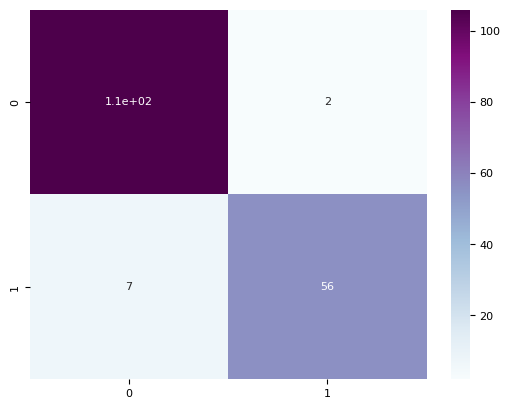

In [ ]:
sns.heatmap(cm1, annot=True, cmap = 'BuPu')

<Axes: >

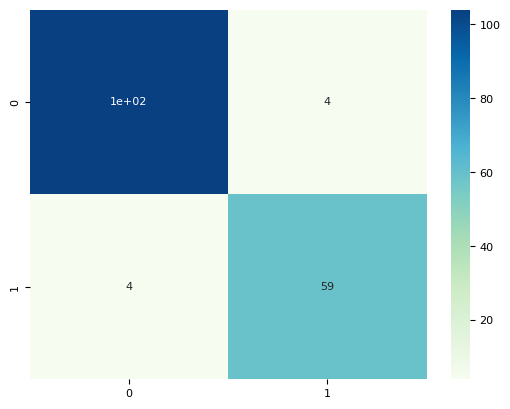

In [ ]:
sns.heatmap(cm2, annot=True, cmap = 'GnBu')

## **Accuracy table**

In [ ]:
from prettytable import PrettyTable
P = PrettyTable()

In [ ]:
# P.field_names = ["Model", "Accuracy"]
# P.add_row(["Logistic Regression", 0.9415204678362573])
# P.add_row(["Naive Bayes", 0.9415204678362573])
# P.add_row(["KNN", 0.9590643274853801])
# P.add_row(["Decision Tree_gini", 0.9590643274853801])
# P.add_row(["Decision Tree_entropy", 0.9707602339181286])

P.field_names = ["Model", "Accuracy"]
P.add_row(["Logistic Regression", ac_lr])
P.add_row(["Naive Bayes", ac_nb])
P.add_row(["KNN", ac_knn])
P.add_row(["Decision Tree_gini", ac_dtg])
P.add_row(["Decision Tree_entropy", ac_dte])

In [ ]:
print(P)

+-----------------------+--------------------+
|         Model         |      Accuracy      |
+-----------------------+--------------------+
|  Logistic Regression  | 0.9415204678362573 |
|      Naive Bayes      | 0.9590643274853801 |
|          KNN          | 0.9473684210526315 |
|   Decision Tree_gini  | 0.9473684210526315 |
| Decision Tree_entropy | 0.9532163742690059 |
+-----------------------+--------------------+
